<a href="https://colab.research.google.com/github/jyesudian/AnoNetworkData/blob/main/Luflow_Logistic_Regression_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: Need help in deriving PCA for a dataset. I need sample code. Also, I would like to use the dataset LuFlow which is available in my Google Drive. I think I need to do data engineering on the dataset. Can you give the step by step example and the code accordingly?
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
%load_ext tensorboard

In [ ]:
### To check whether GPU is used.
gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
    print("GPU is available and being used.")
    print("GPU Details:", gpu_available)
else:
    print("GPU is not available. Using CPU.")

GPU is available and being used.
GPU Details: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
from IPython.display import Image
import os, datetime

In [5]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [6]:
from google.colab import drive
drive.mount('/content/drive')
# Define the file path to your dataset in Google Drive
#file_path = '/content/drive/MyDrive/LuFlow.csv'
#file_path = '/content/drive/MyDrive/VIT/Dataset/LuFlow2021/luflow.csv'


Mounted at /content/drive


In [ ]:
file_path_1 = '/content/drive/MyDrive/VIT/Dataset/LuFlow2021/2022.06.12.csv'
file_path_2 = '/content/drive/MyDrive/VIT/Dataset/LuFlow2021/2022.06.13.csv'
file_path_3 = '/content/drive/MyDrive/VIT/Dataset/LuFlow2021/2022.06.14.csv'

In [ ]:
# Step 1: Load the dataset from Google Drive
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)
df3 = pd.read_csv(file_path_3)

column_names = df1.columns
print("Column Names df1 / Features:")
print(column_names)

column_names = df2.columns
print("Column Names df2 / Features:")
print(column_names)

column_names = df3.columns
print("Column Names df3 / Features:")
print(column_names)

Column Names df1 / Features:
Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port',
       'time_end', 'time_start', 'total_entropy', 'label', 'duration'],
      dtype='object')
Column Names df2 / Features:
Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port',
       'time_end', 'time_start', 'total_entropy', 'label', 'duration'],
      dtype='object')
Column Names df3 / Features:
Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port',
       'time_end', 'time_start', 'total_entropy', 'label', 'duration'],
      dtype='object')


In [ ]:
def dataProperties(df, day):
    print(day)
    df.shape
    print ('Number of rows (Samples): ' , df.shape[0])
    print ('Number of columns (Features): ' , df.shape[1])
#     print(df)
#     print(df.info())
    print(df['label'].value_counts())
    print("\n\n\n")

In [ ]:
%%time
dataProperties(df1, "DF1")

DF1
Number of rows (Samples):  26167
Number of columns (Features):  16
label
outlier      19719
malicious     3748
benign        2700
Name: count, dtype: int64




CPU times: user 3.59 ms, sys: 0 ns, total: 3.59 ms
Wall time: 7.27 ms


In [ ]:
%%time
dataProperties(df2, "DF2")

DF2
Number of rows (Samples):  452123
Number of columns (Features):  16
label
benign       219917
outlier      124966
malicious    107240
Name: count, dtype: int64




CPU times: user 31.1 ms, sys: 0 ns, total: 31.1 ms
Wall time: 31 ms


In [ ]:
%%time
dataProperties(df3, "DF3")

DF3
Number of rows (Samples):  590086
Number of columns (Features):  16
label
outlier    295493
benign     294593
Name: count, dtype: int64




CPU times: user 40.6 ms, sys: 0 ns, total: 40.6 ms
Wall time: 40.4 ms


In [ ]:
dataframes_to_combine = [df1, df2, df3]

# Use pd.concat() to combine the DataFrames row-wise
# The default behavior of concat is to combine along rows (axis=0)
df = pd.concat(dataframes_to_combine, ignore_index=True)

#Display the first few rows of the combined DataFrame to verify
print("First 5 rows of the combined DataFrame:")
print(df.head())

#Check the shape of the combined DataFrame
print("\nShape of the combined DataFrame:")
print(df.shape)

First 5 rows of the combined DataFrame:
   avg_ipt  bytes_in  bytes_out  dest_ip  dest_port  entropy  num_pkts_out  \
0      0.0         0          0      786    31306.0      0.0             1   
1      0.0         0          0      786    24298.0      0.0             1   
2      0.0         0          0      786    31789.0      0.0             1   
3      0.0         0          0      786    29409.0      0.0             1   
4      0.0         0          0      786    60965.0      0.0             1   

   num_pkts_in  proto  src_ip  src_port          time_end        time_start  \
0            0      6     786   47613.0  1655074782132491  1655074782132491   
1            0      6     786   47613.0  1655074782573321  1655074782573321   
2            0      6     786   47613.0  1655074783148517  1655074783148517   
3            0      6     786   47613.0  1655074783149855  1655074783149855   
4            0      6     786   47613.0  1655074783167254  1655074783167254   

   total_entropy

Convert your epoch time to datetime objects and engineer relevant temporal features like hour of the day, day of the week, and flow duration. These engineered features are much more informative and suitable as input for ML and ANN algorithms than the raw epoch timestamps.

In our dataset, we have the epoch time in micro sec, so unit=us is used.

In [ ]:
df['time_start_dt'] = pd.to_datetime(df['time_start'], unit='us', errors='coerce')
df['time_end_dt'] = pd.to_datetime(df['time_end'], unit='us', errors='coerce')
# Extract components of the start time
df['start_hour_of_day'] = df['time_start_dt'].dt.hour
df['start_day_of_week'] = df['time_start_dt'].dt.dayofweek # Monday=0, Sunday=6
df['start_minute_of_hour'] = df['time_start_dt'].dt.minute
#Display the first few rows of the combined DataFrame to verify
print("First 5 rows of the combined DataFrame:")
print(df.head())

#Check the shape of the combined DataFrame
print("\nShape of the combined DataFrame:")
print(df.shape)

First 5 rows of the combined DataFrame:
   avg_ipt  bytes_in  bytes_out  dest_ip  dest_port  entropy  num_pkts_out  \
0      0.0         0          0      786    31306.0      0.0             1   
1      0.0         0          0      786    24298.0      0.0             1   
2      0.0         0          0      786    31789.0      0.0             1   
3      0.0         0          0      786    29409.0      0.0             1   
4      0.0         0          0      786    60965.0      0.0             1   

   num_pkts_in  proto  src_ip  ...          time_end        time_start  \
0            0      6     786  ...  1655074782132491  1655074782132491   
1            0      6     786  ...  1655074782573321  1655074782573321   
2            0      6     786  ...  1655074783148517  1655074783148517   
3            0      6     786  ...  1655074783149855  1655074783149855   
4            0      6     786  ...  1655074783167254  1655074783167254   

   total_entropy    label duration            

In [ ]:
# You can drop the original 'time_start' and 'time_end' columns
df = df.drop(columns=['time_start', 'time_end'])

We can see whether keeping entropy makes the algorithm any better. So, we shall have two type of datasets. One with the entropies and the other with out the same.

In [ ]:
# Identify the entropy columns. You'll need to know their exact names.
# Let's assume your entropy columns are named 'entropy' and 'total_entropy'
entropy_columns = ['entropy', 'total_entropy'] # Replace with actual column names

# Create a copy of the cleaned DataFrame that will include the entropy columns
df_with_entropies = df.copy()

# Create another copy of the cleaned DataFrame that you will modify
df_without_entropies = df.copy()

# Drop the entropy columns from the 'df_without_entropies' DataFrame
# Use errors='ignore' in case some columns were not found (though they should be if named correctly)
df_without_entropies = df_without_entropies.drop(columns=entropy_columns, errors='ignore')

# Verify the column names in both DataFrames
print("Columns in df_with_entropies:")
print(df_with_entropies.columns)

print("\nColumns in df_without_entropies:")
print(df_without_entropies.columns)

Columns in df_with_entropies:
Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port',
       'total_entropy', 'label', 'duration', 'time_start_dt', 'time_end_dt',
       'start_hour_of_day', 'start_day_of_week', 'start_minute_of_hour'],
      dtype='object')

Columns in df_without_entropies:
Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port', 'label',
       'duration', 'time_start_dt', 'time_end_dt', 'start_hour_of_day',
       'start_day_of_week', 'start_minute_of_hour'],
      dtype='object')


**Store these datasets in Google Drive as they can be used as starting point few use cases.**

In [ ]:
entropy_file_path_in_drive = '/content/drive/MyDrive/VIT/Dataset/LuFlow2021/WithEntropies.csv'
noentropy_file_path_in_drive = '/content/drive/MyDrive/VIT/Dataset/LuFlow2021/WithOutEntropies.csv'

df_with_entropies.to_csv(entropy_file_path_in_drive, index=False)
df_without_entropies.to_csv(noentropy_file_path_in_drive, index=False)

print(f"DataFrame successfully saved to: {entropy_file_path_in_drive}, {noentropy_file_path_in_drive}")


In [7]:
# Define the file paths in Google Drive
saved_entropy_file_path = '/content/drive/MyDrive/VIT/Dataset/LuFlow2021/WithEntropies.csv'
saved_noentropy_file_path = '/content/drive/MyDrive/VIT/Dataset/LuFlow2021/WithOutEntropies.csv'

# Read the CSV files back into pandas DataFrames
df_with_entropies_loaded = pd.read_csv(saved_entropy_file_path)
df_without_entropies_loaded = pd.read_csv(saved_noentropy_file_path)

# Optional: Display the first few rows and shape to verify they are loaded correctly
print("First 5 rows of df_with_entropies_loaded:")
print(df_with_entropies_loaded.head())
print("\nShape of df_with_entropies_loaded:")
print(df_with_entropies_loaded.shape)

First 5 rows of df_with_entropies_loaded:
   avg_ipt  bytes_in  bytes_out  dest_ip  dest_port  entropy  num_pkts_out  \
0      0.0         0          0      786    31306.0      0.0             1   
1      0.0         0          0      786    24298.0      0.0             1   
2      0.0         0          0      786    31789.0      0.0             1   
3      0.0         0          0      786    29409.0      0.0             1   
4      0.0         0          0      786    60965.0      0.0             1   

   num_pkts_in  proto  src_ip  src_port  total_entropy    label  duration  \
0            0      6     786   47613.0            0.0  outlier       0.0   
1            0      6     786   47613.0            0.0  outlier       0.0   
2            0      6     786   47613.0            0.0  outlier       0.0   
3            0      6     786   47613.0            0.0  outlier       0.0   
4            0      6     786   47613.0            0.0  outlier       0.0   

                time_start

**Now Proceed With Entropies as the Entropy calculation is done by the Luflow dataset providers itself.**

In [8]:
def dropInfNull(df):
    print (df.shape)

    # replace infinity value as null value
    df = df.replace(["Infinity", "infinity"], np.inf)
    df = df.replace([np.inf, -np.inf], np.nan)

    # drop all null values
    df.dropna(inplace=True)

    print (df.shape)

    return df

In [10]:
%%time
network_data_d1 = dropInfNull(df_with_entropies_loaded)

(1068376, 19)
(964168, 19)
CPU times: user 1.66 s, sys: 66.5 ms, total: 1.73 s
Wall time: 1.72 s


In [11]:
#Get the unique labels
unique_labels = network_data_d1['label'].unique()

#Get the counts of each unique label
label_counts = network_data_d1['label'].value_counts()

#Print the results

print("Unique Labels:")
print(unique_labels)

print("\nCounts of Each Label:")
print(label_counts)

Unique Labels:
['outlier' 'benign' 'malicious']

Counts of Each Label:
label
benign       517209
outlier      368843
malicious     78116
Name: count, dtype: int64


In an anomaly detection context, "outlier" often signifies something unusual or potentially suspicious, even if it doesn't fit a known malicious signature. Grouping "malicious" and "outlier" together allows your model to learn to distinguish between "normal" traffic and any form of unusual or potentially harmful traffic captured in these two categories.

In [12]:
network_data_d1['binary_label'] = network_data_d1['label'].apply(lambda x: 0 if x == 'benign' else 1)

## After converting the binary_label, we can drop the label column from the dataset
del_columns = ['label']

network_data_d1 = network_data_d1.drop(columns=del_columns, errors='ignore')

In [13]:
#Get the counts of each unique label
label_counts = network_data_d1['binary_label'].value_counts()
print("\nCounts of Each Label:")
print(label_counts)


Counts of Each Label:
binary_label
0    517209
1    446959
Name: count, dtype: int64


In [14]:
df_balanced = network_data_d1

**Understanding the Data Type of the Dataset**

In [15]:
# Access the dtypes attribute
feature_data_types = df_balanced.dtypes

# Print the data types
print("Data Types of Features:")
print(feature_data_types)

Data Types of Features:
avg_ipt                 float64
bytes_in                  int64
bytes_out                 int64
dest_ip                   int64
dest_port               float64
entropy                 float64
num_pkts_out              int64
num_pkts_in               int64
proto                     int64
src_ip                    int64
src_port                float64
total_entropy           float64
duration                float64
time_start_dt            object
time_end_dt              object
start_hour_of_day         int64
start_day_of_week         int64
start_minute_of_hour      int64
binary_label              int64
dtype: object


**Raw datetime64[ns] objects cannot be directly used as input features for most standard ML/ANN algorithms. These algorithms expect numerical inputs. As the temporal values such as start_hour_of_day, start_day_of_week and start_minute_of_hour is captured with in dataset, those date time format columns can be removed.**

In [16]:
df_balanced = df_balanced.drop(columns=['time_start_dt', 'time_end_dt'])

**Drop Constant Column**

In [17]:
%%time
# drop the constant columns (which varience is 0)
variances = df_balanced.var(numeric_only=True)
constant_columns = variances[variances == 0].index
df_balanced = df_balanced.drop(constant_columns, axis=1)

print(constant_columns)
print (df_balanced.shape)

Index(['dest_ip', 'src_ip'], dtype='object')
(964168, 15)
CPU times: user 78.1 ms, sys: 31.2 ms, total: 109 ms
Wall time: 108 ms


**Drop Duplicate Column**

In [18]:
duplicates = set()
for i in range(0, len(df_balanced.columns)):
    col1 = df_balanced.columns[i]
    for j in range(i+1, len(df_balanced.columns)):
        col2 = df_balanced.columns[j]
        if(df_balanced[col1].equals(df_balanced[col2])):
            duplicates.add(col2)

print (duplicates)
df_balanced.drop(duplicates, axis=1, inplace=True)
print (df_balanced.shape)

set()
(964168, 15)


**Drop Columns based on correlation**

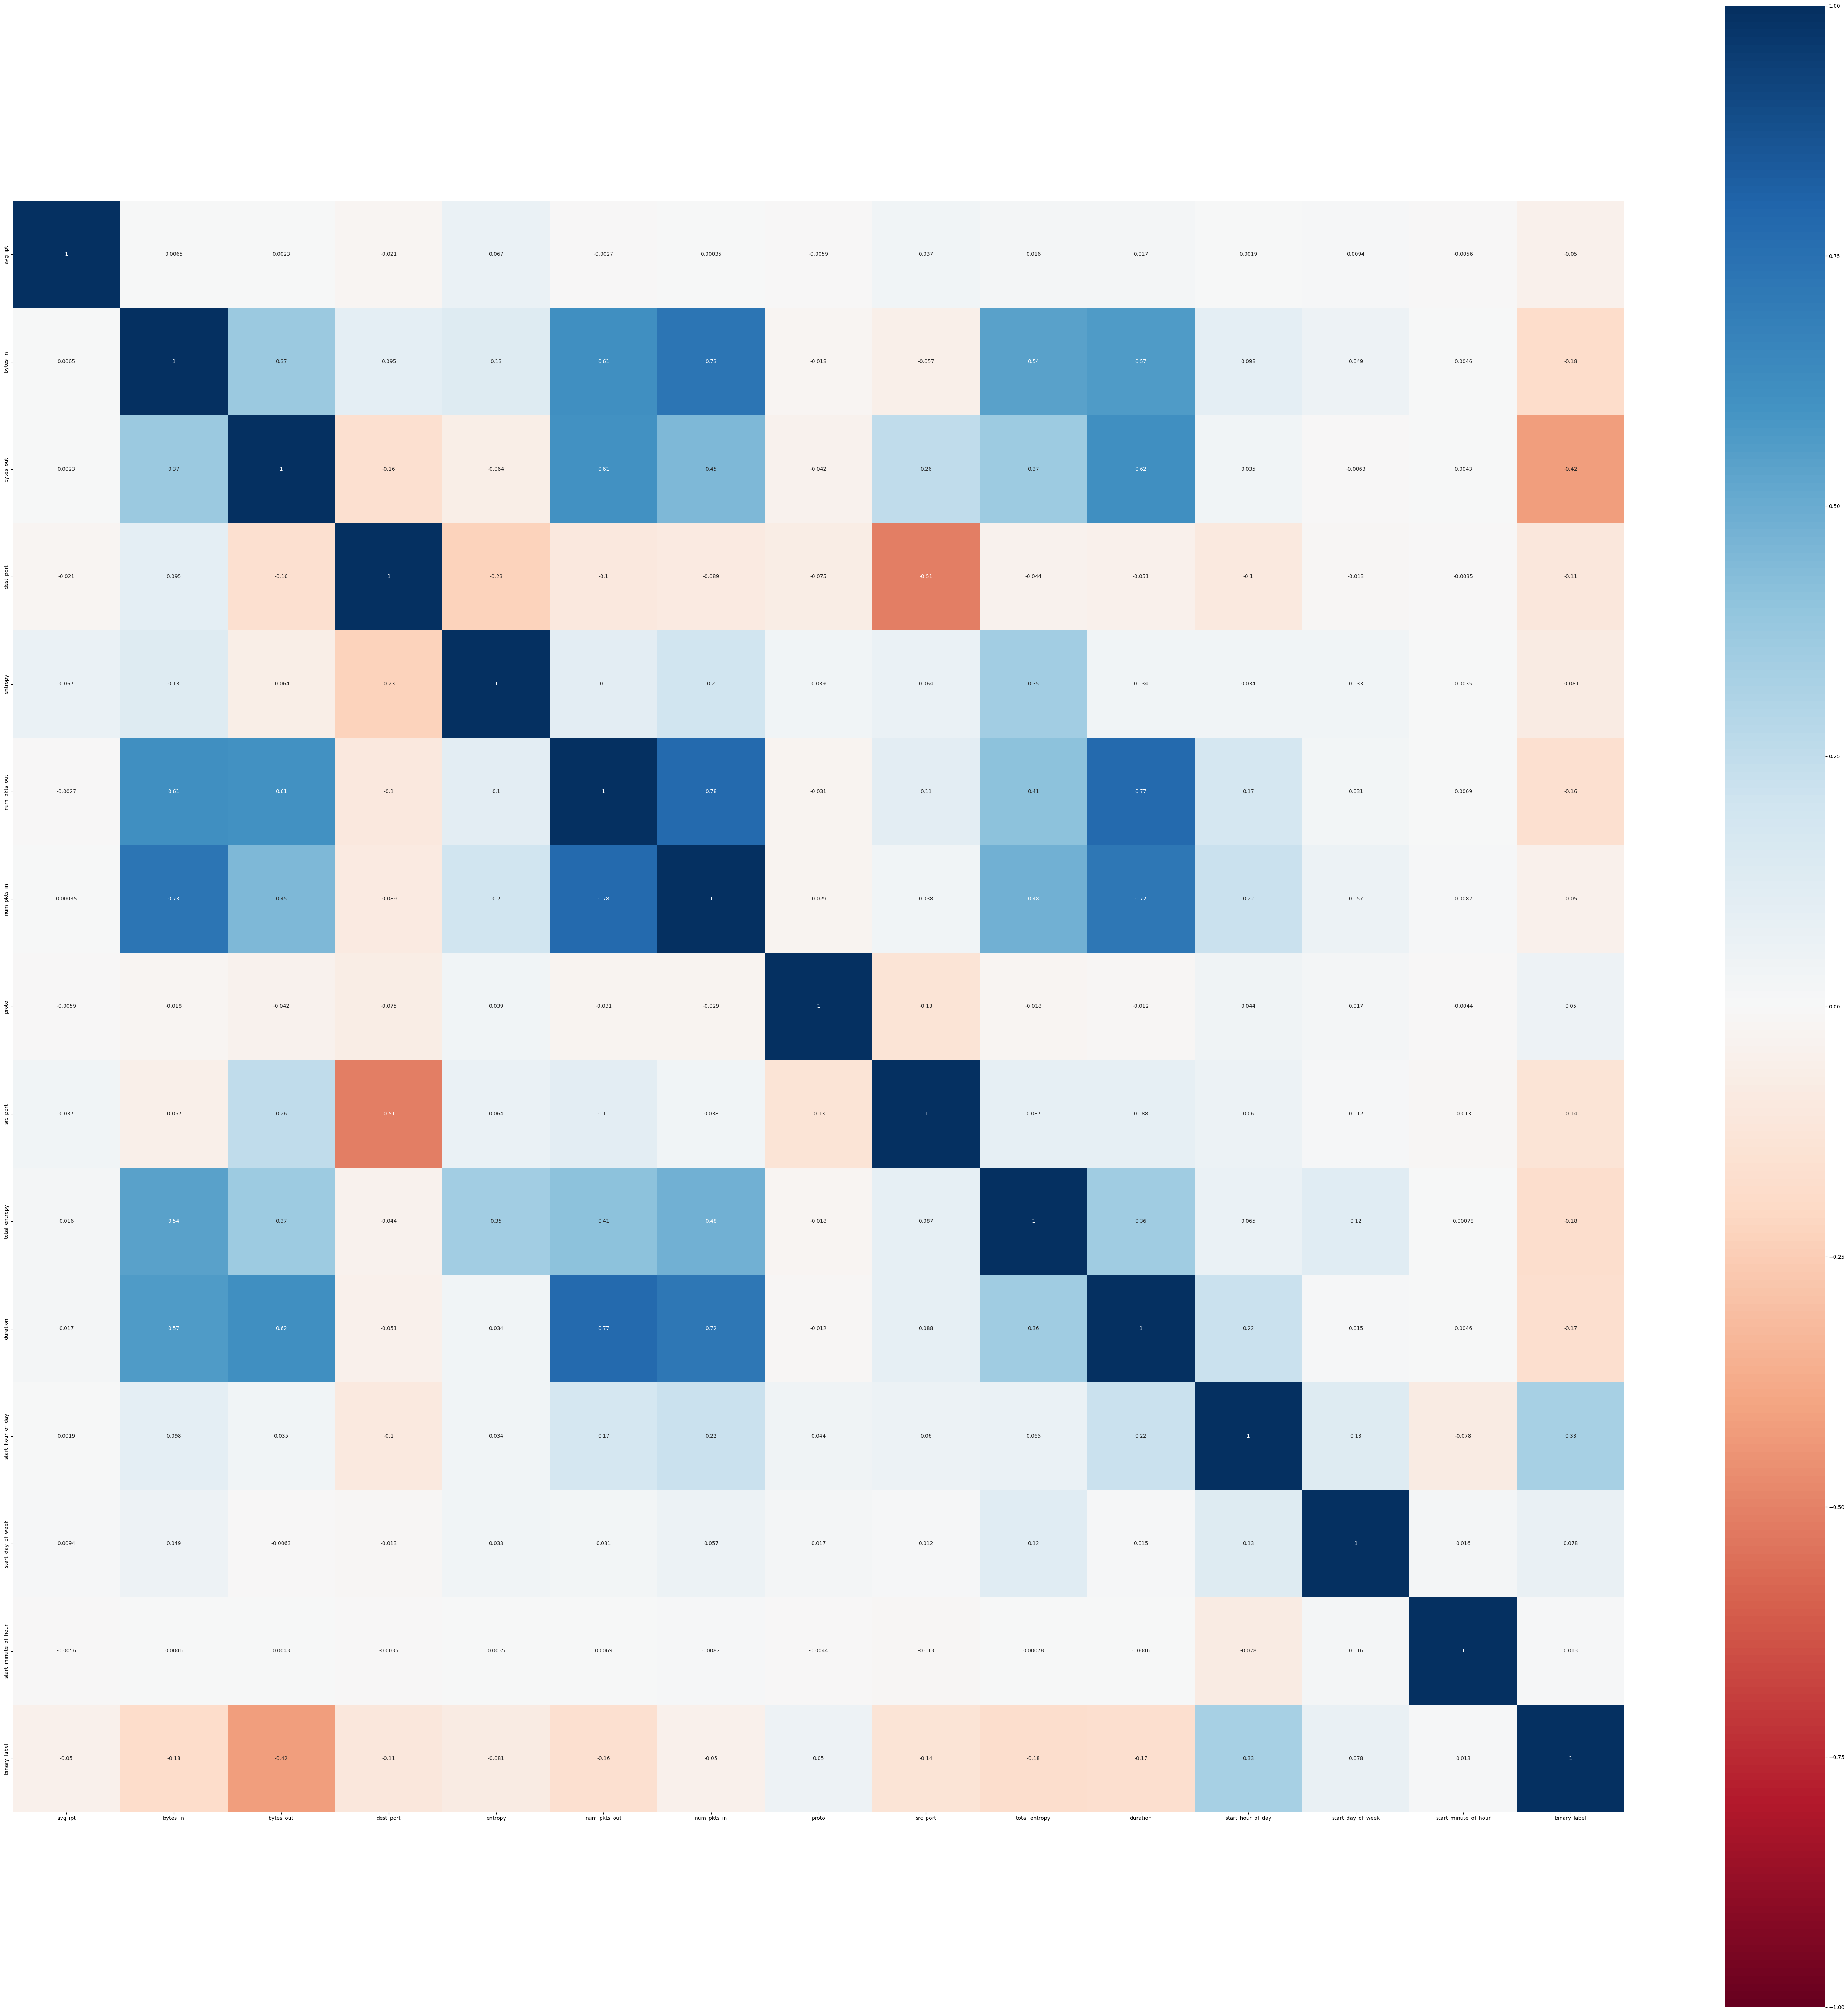

CPU times: user 2.9 s, sys: 240 ms, total: 3.14 s
Wall time: 3.17 s


In [19]:
%%time
# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = df_balanced.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [20]:
%%time
correlated_col = set()
is_correlated = [True] * len(corr.columns)
threshold = 0.90
for i in range (len(corr.columns)):
    if(is_correlated[i]):
        for j in range(i):
          if (corr.iloc[i, j] >= threshold) and (is_correlated[j]):
            colname = corr.columns[j]
            is_correlated[j]=False
            correlated_col.add(colname)

print(correlated_col)
print(len(correlated_col))

set()
0
CPU times: user 2.45 ms, sys: 0 ns, total: 2.45 ms
Wall time: 2.44 ms


In [21]:
%%time
df_balanced.drop(correlated_col, axis=1, inplace=True)
print (df_balanced.shape)

(964168, 15)
CPU times: user 23.3 ms, sys: 21.3 ms, total: 44.6 ms
Wall time: 43.4 ms


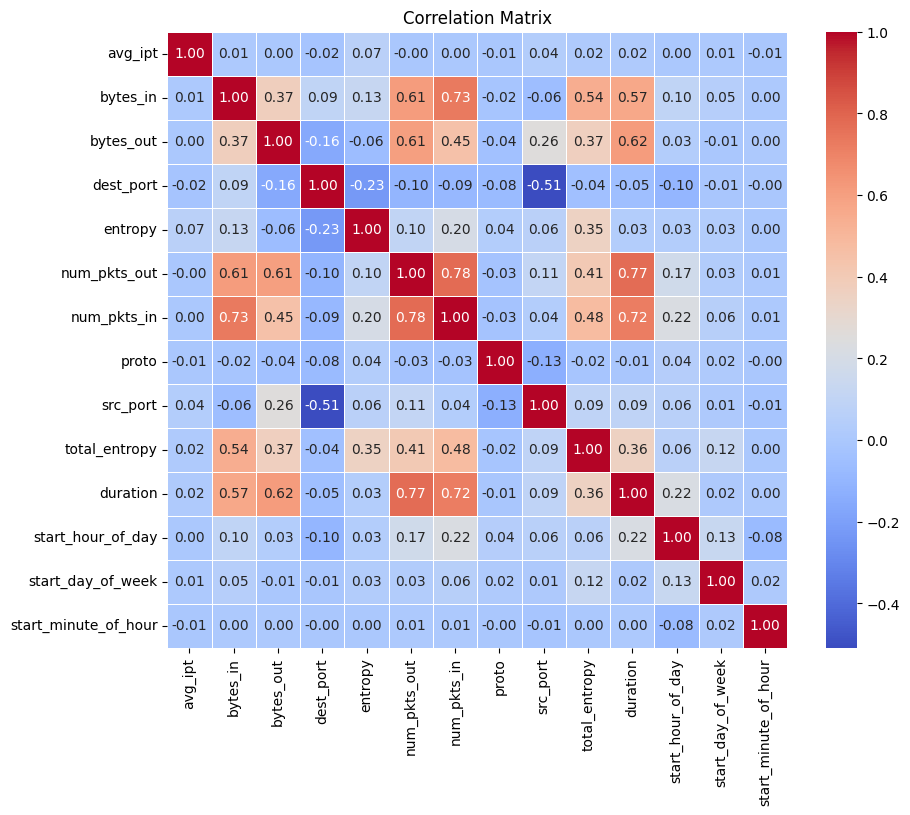

In [22]:
# Calculate correlation matrix
correlation_matrix = df_balanced.drop('binary_label', axis=1).corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

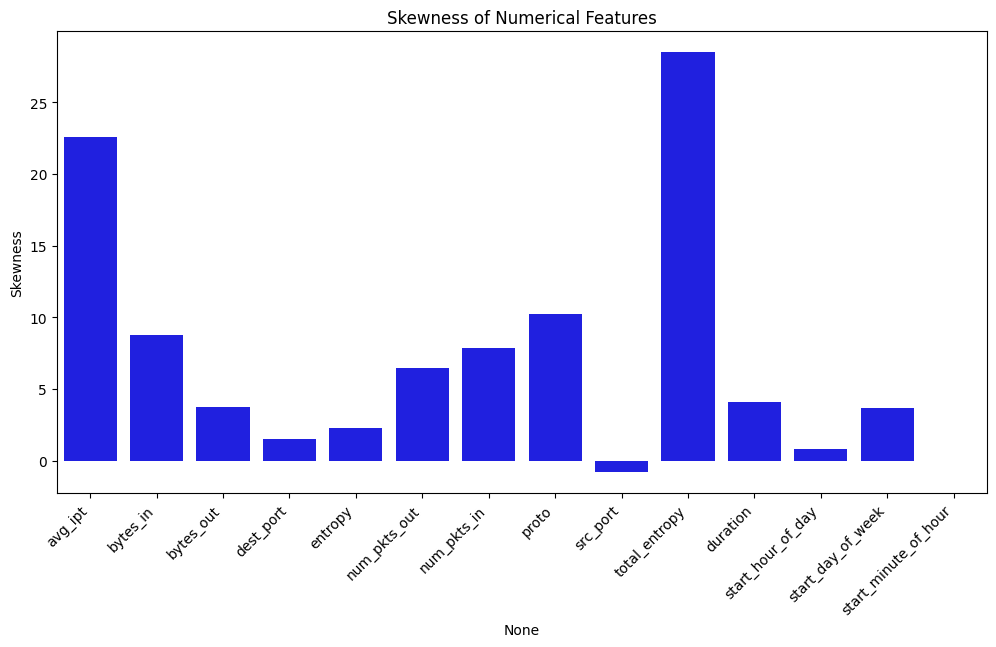

In [23]:
# Calculate skewness for each numerical column
skewness = df_balanced.drop('binary_label', axis=1).skew()

# Create a bar plot or a histogram of skewness values
plt.figure(figsize=(12, 6))
sns.barplot(x=skewness.index, y=skewness.values, color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Skewness of Numerical Features')
plt.ylabel('Skewness')
plt.show()

In [24]:
%%time
X=df_balanced.drop(["binary_label"], axis=1)
y=df_balanced["binary_label"]

# split the data for evaluation
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =42, shuffle=True)

CPU times: user 236 ms, sys: 15.5 ms, total: 252 ms
Wall time: 252 ms


In [25]:
x_train

avg_ipt  bytes_in  bytes_out  dest_port   entropy  num_pkts_out  \
956978  339.166667      1359        745       22.0  6.913109            15   
425615    0.000000         0       1751     9200.0  4.994593             2   
582018    0.000000         0       6891     9200.0  3.347975             5   
203853    0.000000         0       5792     9200.0  3.891722             5   
895316    0.000000         0          0    39748.0  0.000000             1   
...            ...       ...        ...        ...       ...           ...   
288584   35.857143        34         29     5900.0  5.044661             7   
409916   60.333333       156        256       22.0  7.495762             2   
147070   35.000000        34         29     5900.0  5.127916             7   
741539    0.000000         0       4312     9200.0  5.612308             3   
135167    0.000000         0      49054     9200.0  0.689396            10   

        num_pkts_in  proto  src_port  total_entropy  duration  \
956978           19      6   37328.0    14545.18100  5.261296   
425615            0      6   45334.0     8745.53200  0.000028   
582018            0      6   47232.0    23070.89800  0.000063   
203853            0      6   45326.0    22540.85500  0.519397   
895316            0      6    5900.0        0.00000  0.000000   
...             ...    ...       ...            ...       ...   
288584           10      6   44376.0      317.81363  0.472773   
409916            3      6   40106.0     3088.25400  0.181689   
147070           10      6   45512.0      323.05870  0.471355   
741539            0      6   47234.0    24200.27100  0.000021   
135167           26      6   51564.0    33817.65200  0.001842   

        start_hour_of_day  start_day_of_week  start_minute_of_hour  
956978                 13                  1                    16  
425615                  5                  0                    10  
582018                  3                  1                    46  
203853                  3                  0                    21  
895316                  5                  1                    37  
...                   ...                ...                   ...  
288584                 16                  0                    57  
409916                 14                  0                    54  
147070                 16                  0                    19  
741539                 13                  5                    42  
135167                 18                  0                    24  

[771334 rows x 14 columns]

In [26]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set
x_train = scaler.fit_transform(x_train)

# Transform the testing set using the same scaler
x_test = scaler.transform(x_test)

In [27]:
# Initialize the model
# class_weight='balanced' can help with imbalanced data
model_lr = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)

In [28]:
# Train the model
model_lr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [29]:
# Make predictions
y_pred_lr = model_lr.predict(x_test)
y_pred_proba_lr = model_lr.predict_proba(x_test)[:, 1]

:# **Calculate the Metrics for One Class SVM**

In [30]:
print("--- Logistic Regression ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_proba_lr))

--- Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89    103684
           1       0.84      0.93      0.88     89150

    accuracy                           0.88    192834
   macro avg       0.89      0.89      0.88    192834
weighted avg       0.89      0.88      0.88    192834

ROC AUC Score:
0.9591078514416177


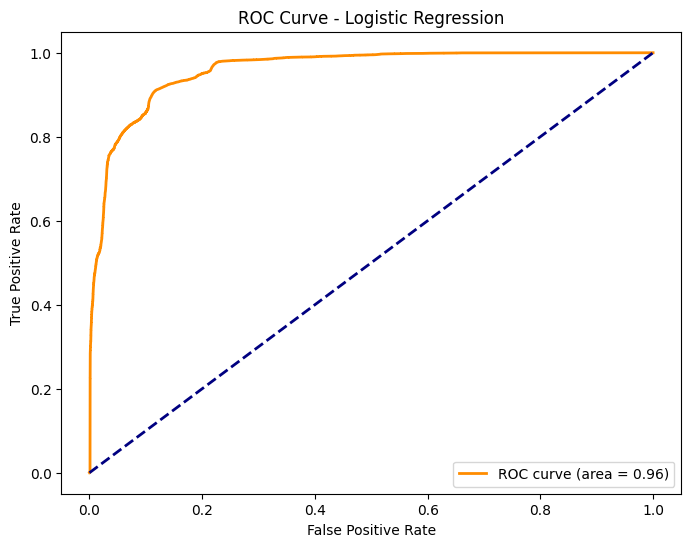

In [31]:
# Plot ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [32]:
# Calculate the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Print the confusion matrix
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_lr)

Confusion Matrix for Logistic Regression:
[[87658 16026]
 [ 6253 82897]]


In [35]:
# Extract TN, FP, FN, TP from the confusion matrix
# The confusion matrix structure for binary classification in sklearn is:
# [[TN, FP],
#  [FN, TP]]
tn, fp, fn, tp = conf_matrix_lr.ravel()

# Print the values
print("\nConfusion Matrix Components:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


Confusion Matrix Components:
True Negatives (TN): 87658
False Positives (FP): 16026
False Negatives (FN): 6253
True Positives (TP): 82897


In [33]:
# Calculate and print the classification report
class_report_svm = classification_report(y_test, y_pred_lr)
print("\nClassification Report for One Class SVM:")
print(class_report_svm)




Classification Report for One Class SVM:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89    103684
           1       0.84      0.93      0.88     89150

    accuracy                           0.88    192834
   macro avg       0.89      0.89      0.88    192834
weighted avg       0.89      0.88      0.88    192834



**K-Nearest Neighbour**

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
# Number of neighbors (n_neighbors) is a key hyperparameter
model_knn = KNeighborsClassifier(n_neighbors=5) # Start with 5 neighbors

# Train the model
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [37]:
# Make predictions
y_pred_knn = model_knn.predict(x_test)
y_pred_proba_knn = model_knn.predict_proba(x_test)[:, 1]

--- K-Nearest Neighbors ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    103684
           1       1.00      1.00      1.00     89150

    accuracy                           1.00    192834
   macro avg       1.00      1.00      1.00    192834
weighted avg       1.00      1.00      1.00    192834

ROC AUC Score:
0.9989270534312343


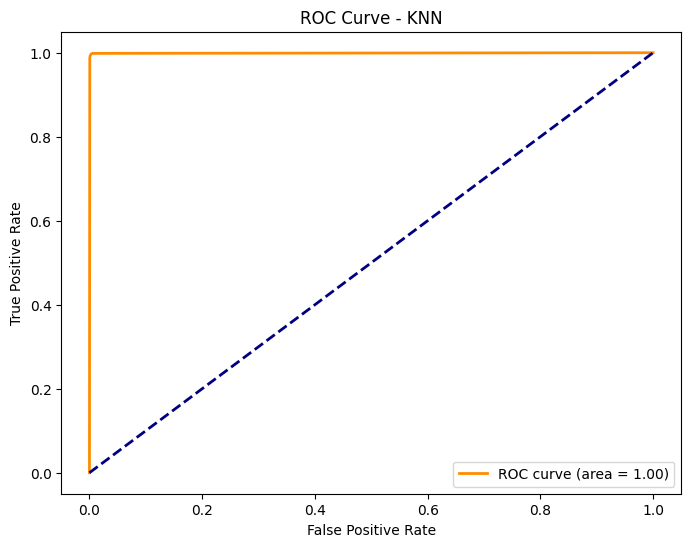

In [38]:
# Evaluate
print("--- K-Nearest Neighbors ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_proba_knn))
# Plot ROC curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.show()

In [41]:
# Calculate the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Print the confusion matrix
print("Confusion Matrix for KNN Neighbour:")
print(conf_matrix_knn)

Confusion Matrix for KNN Neighbour:
[[103477    207]
 [   436  88714]]


In [42]:
# Extract TN, FP, FN, TP from the confusion matrix
# The confusion matrix structure for binary classification in sklearn is:
# [[TN, FP],
#  [FN, TP]]
tn, fp, fn, tp = conf_matrix_knn.ravel()

# Print the values
print("\nConfusion Matrix Components:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


Confusion Matrix Components:
True Negatives (TN): 103477
False Positives (FP): 207
False Negatives (FN): 436
True Positives (TP): 88714
